In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [0]:
train = pd.read_csv('num_train.csv')

In [0]:
train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Price
0,6,2010,72000,3,1,1,42.403246,998,58.16,5,25,1.75
1,9,2015,41000,2,1,1,40.716900,1582,126.20,5,22,12.50
2,8,2011,46000,5,1,1,42.811364,1199,88.70,5,21,4.50
3,8,2012,87000,2,1,1,42.993900,1248,88.76,7,25,6.00
4,1,2013,40670,2,0,2,31.464000,1968,140.80,5,9,17.74


In [0]:
train.loc[train['Fuel_Type']==1]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Price
4446,8,2016,50000,1,0,1,124.27,72,41.0,5,17,13.00
4904,6,2011,44000,1,0,1,95.00,1798,73.0,5,14,12.75


In [0]:
train = train.drop([4446,4904])

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017 entries, 0 to 6018
Data columns (total 12 columns):
Location             6017 non-null int64
Year                 6017 non-null int64
Kilometers_Driven    6017 non-null int64
Fuel_Type            6017 non-null int64
Transmission         6017 non-null int64
Owner_Type           6017 non-null int64
Mileage              6017 non-null float64
Engine               6017 non-null int64
Power                6017 non-null float64
Seats                6017 non-null int64
Brand                6017 non-null int64
Price                6017 non-null float64
dtypes: float64(3), int64(9)
memory usage: 611.1 KB


In [0]:
edit = {
    2:1,
    3:2,
    4:3,
    5:4
}
train['Fuel_Type'] = train['Fuel_Type'].map(edit)

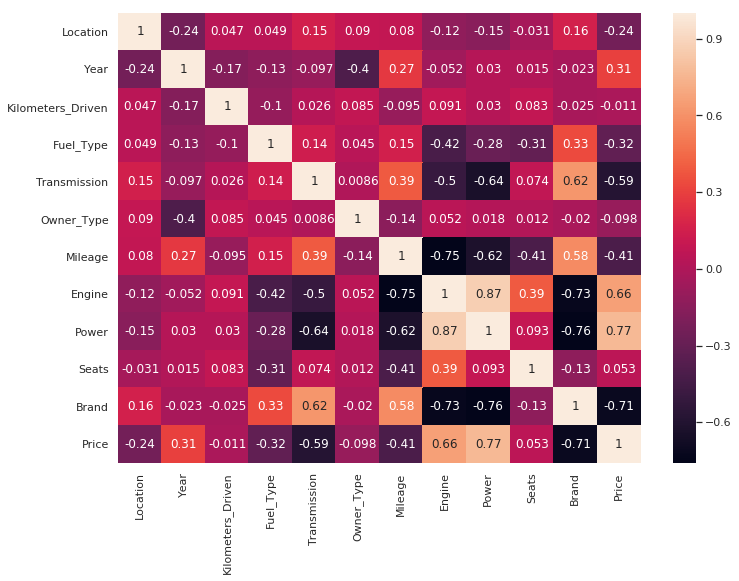

In [0]:
sns.heatmap(train.corr(),annot=True)

In [0]:
train.to_csv('new_train.csv',index=False)

In [0]:
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.model_selection import train_test_split


In [0]:
y = train['Price']
train.drop('Price',axis=1,inplace=True)
X = train.values


In [0]:
X.shape

(6017, 11)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(    
    X, y, test_size=0.2, random_state=103)

In [0]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols
param_test1 = {
    #'max_depth':range(3,10,2),
    'min_child_weight':range(5,10,2)
}
gsearch1 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=1000, max_depth=5,
                                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=23), 
                       param_grid = param_test1, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch1.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.8, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=5,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=4,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=23, silent=None,
                                    subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'min_child_weight': range(5, 10, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_

In [0]:
gsearch1.best_params_, gsearch1.best_score_   #old values :({'max_depth': 5, 'min_child_weight': 5}, 0.9385341912113608)

({'min_child_weight': 5}, 0.9385341912113608)

In [0]:
gsearch1.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=5, missing=None, n_estimators=1000,
             n_jobs=1, nthread=4, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=23,
             silent=None, subsample=0.8, verbosity=1)

In [0]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols
param_test1 = {
    'max_depth':[4,5,6],
    'min_child_weight':[3,4,5,6]
}
gsearch2 = GridSearchCV(estimator =gsearch1.best_estimator_, param_grid = param_test1, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch2.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.8, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=5,
                                    min_child_weight=5, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=4,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=23, silent=None,
                                    subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'max_depth': [4, 5, 6],
                         'min_child_weight': [3, 4, 5, 6]},
           

In [0]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 5, 'min_child_weight': 4}, 0.9386167243054626)

In [0]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,15)]
}
gsearch3 = GridSearchCV(estimator = gsearch2.best_estimator_, 
 param_grid = param_test3, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch3.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.8, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=5,
                                    min_child_weight=4, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=4,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=23, silent=None,
                                    subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 

In [0]:
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 1.1}, 0.9396412360327261)

In [0]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = gsearch3.best_estimator_, 
 param_grid = param_test4, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch4.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.8, gamma=1.1,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=5,
                                    min_child_weight=4, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=4,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=23, silent=None,
                                    subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'subsample': [0.6, 0.7, 0.

In [0]:
gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 0.8, 'subsample': 0.8}, 0.9396412360327261)

In [0]:
param_test5 = {
 'subsample':[i/100.0 for i in range(65,86,5)],
 'colsample_bytree':[i/100.0 for i in range(65,86,5)]
}
gsearch5 = GridSearchCV(estimator = gsearch4.best_estimator_, 
 param_grid = param_test5, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch5.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.8, gamma=1.1,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=5,
                                    min_child_weight=4, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=4,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=23, silent=None,
                                    subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'colsample_bytree': [0.65, 0.7, 0.75, 0.8, 0.85],
                         'subsample': [0.65

In [0]:
gsearch5.best_params_, gsearch5.best_score_

({'colsample_bytree': 0.75, 'subsample': 0.85}, 0.9409976450021926)

In [0]:
param_test6 = {
 'reg_alpha':[1e-6,1e-5,1e-3,1e-2, 1e-4]
}
gsearch6 = GridSearchCV(estimator = gsearch5.best_estimator_, 
 param_grid = param_test6, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch6.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.75, gamma=1.1,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=5,
                                    min_child_weight=4, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=4,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=23, silent=None,
                                    subsample=0.85, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'reg_alpha': [1e-06, 1e-05, 0.001, 0.01, 0.0001]},
             pre_dispatch='2*n_jobs', re

In [0]:
gsearch6.best_params_, gsearch6.best_score_    #old values {'reg_alpha': 1e-05}, 0.9409976537321864

({'reg_alpha': 1e-05}, 0.9409976537321864)

In [0]:
param_test7 = {
 'learning_rate':[0.1,0.01,0.001],
    'n_estimators':[800,900,1000,1100,1200]
}
gsearch7 = GridSearchCV(estimator = gsearch6.best_estimator_, 
 param_grid = param_test7, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch7.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.75, gamma=1.1,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=5,
                                    min_child_weight=4, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=4,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=1e-05,
                                    reg_lambda=1, scale_pos_weight=1, seed=23,
                                    silent=None, subsample=0.85, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [800, 900

In [0]:
gsearch7.best_params_, gsearch7.best_score_ 

({'learning_rate': 0.1, 'n_estimators': 800}, 0.9410358869047674)

In [0]:
param_test8 = {
    'n_estimators':[472,474,476,478,480,481,482,483,484,486,488]
}
gsearch8 = GridSearchCV(estimator =gsearch7.best_estimator_, 
 param_grid = param_test8, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch8.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.75, gamma=1.1,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=5,
                                    min_child_weight=4, missing=None,
                                    n_estimators=800, n_jobs=1, nthread=4,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=1e-05,
                                    reg_lambda=1, scale_pos_weight=1, seed=23,
                                    silent=None, subsample=0.85, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'n_estimators': [472, 474, 476, 478, 480, 481, 482,
                                    

In [0]:
gsearch8.best_params_, gsearch8.best_score_  #{'n_estimators': 500}, 0.9412888207673402

({'n_estimators': 483}, 0.9413544033024553)

In [0]:
param_test9 = {
    'max_delta_step':[1,2,3,4,5,6,7,8,9,0,10]
}
gsearch9 = GridSearchCV(estimator =gsearch8.best_estimator_, 
 param_grid = param_test9, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch9.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.75, gamma=1.1,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=5,
                                    min_child_weight=4, missing=None,
                                    n_estimators=483, n_jobs=1, nthread=4,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=1e-05,
                                    reg_lambda=1, scale_pos_weight=1, seed=23,
                                    silent=None, subsample=0.85, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'max_delta_step': [1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 10]},
             pre_dispatch='2*n_jo

In [0]:
gsearch9.best_params_, gsearch9.best_score_  

({'max_delta_step': 0}, 0.9413544033024553)

In [0]:
param_test10 = {
     'colsample_bylevel':[0.95,1],
    'colsample_bynode':[0.95,1]
    
}
gsearch10 = GridSearchCV(estimator =gsearch9.best_estimator_, 
 param_grid = param_test10, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch10.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.75, gamma=1.1,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=5,
                                    min_child_weight=4, missing=None,
                                    n_estimators=483, n_jobs=1, nthread=4,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=1e-05,
                                    reg_lambda=1, scale_pos_weight=1, seed=23,
                                    silent=None, subsample=0.85, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'colsample_bylevel': [0.95, 1],
                         'colsample_bynode': [0.95, 1]},

In [0]:
gsearch10.best_params_,gsearch10.best_score_

({'colsample_bylevel': 1, 'colsample_bynode': 1}, 0.9413544033024553)

In [0]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [0]:
final_xgb = gsearch10.best_estimator_

In [0]:
final_xgb.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.75, gamma=1.1,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=4, missing=None, n_estimators=483,
             n_jobs=1, nthread=4, objective='reg:squarederror', random_state=0,
             reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, seed=23,
             silent=None, subsample=0.85, verbosity=1)

In [0]:
train_predictions=final_xgb.predict(x_train)

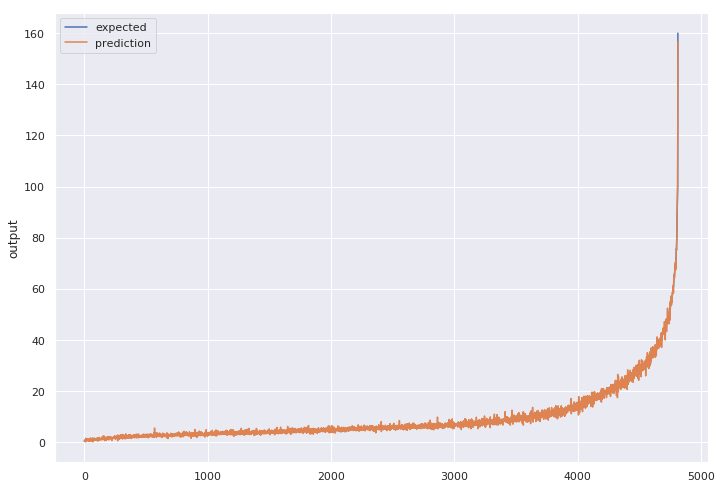

In [0]:
chart_regression(train_predictions.flatten(),y_train)

In [0]:
from sklearn.externals import joblib
from numpy import loadtxt
joblib.dump(final_xgb, "final_xgb.joblib.dat")

['final_xgb.joblib.dat']

In [0]:
test_predictions=final_xgb.predict(x_test)

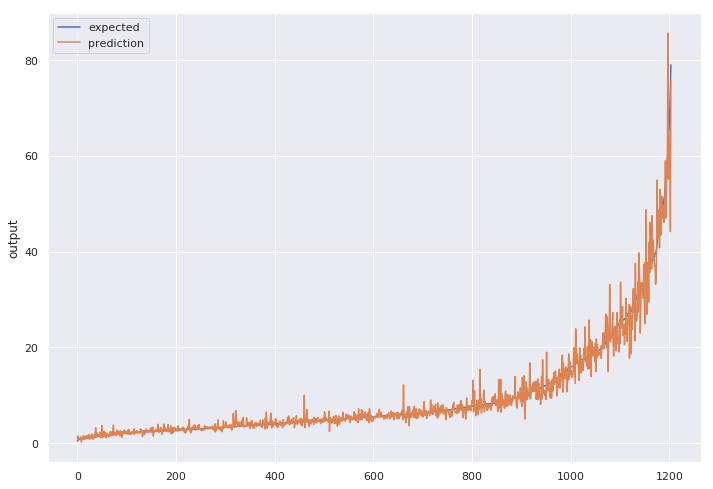

In [0]:
chart_regression(test_predictions.flatten(),y_test)

In [0]:
from sklearn.metrics import r2_score
print("R2 : {}".format(r2_score(test_predictions,y_test)))

R2 : 0.9556366416579878


In [0]:
print("R2 : {}".format(r2_score(train_predictions,y_train)))

R2 : 0.995090455183282
